In [18]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# Data Credit: City of Anchorage (https://www.kaggle.com/yamqwe/dog-names-over-timee)
# Data Visualization with Python (https://www.geeksforgeeks.org/data-visualization-with-python/)
# Parsing Text with Python (https://www.vipinajayakumar.com/parsing-text-with-python/)
# SwampHacks VIII

In [48]:
df = pd.read_csv('dog-names-over-time-1.csv', header=0, sep=' *, *', skipinitialspace=True, engine='python')
num = df.count


(Index(['DogName', 'Count', 'Rank', 'Date', 'Set'], dtype='object'),
        DogName  Rank
 0        BELLA     1
 1         LUCY     2
 2        SADIE     3
 3          MAX     4
 4        BUDDY     5
 ...        ...   ...
 16227   ZOTTER  1259
 16228  ZSA ZSA  1259
 16229    ZUILA  1259
 16230     ZUNI  1259
 16231     ZURI  1259
 
 [16232 rows x 2 columns])

In [90]:
firstLetter = widgets.Text(
    placeholder='Your favorite letter here'
)
numberOfNames = widgets.IntSlider(
    value = 5,
    min=0,
    max = 10,
    step = 1,
    style={'description_width':'initial'},
)

file = open("brownDog.jpg", "rb")
img1 = file.read()

file = open("whiteDog.jpg", "rb")
img2 = file.read()

Image1 = widgets.Image(
    value = img1,
    format = 'jpg',
    width = 100,
    height =100,
)

Image2 = widgets.Image(
    value = img2,
    format ='jpg',
    width=100,
    height=100,

)

button_search = widgets.Button(
                description='Search',
                tooltip='Search',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print(df['DogName'].loc[df['DogName'].str.startswith(firstLetter.value.upper())].head(numberOfNames.value))

button_search.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_search, output])

text_0 = widgets.HTML("<h1>Dog Names<h1>")
text_1 = widgets.HTML("<p>Want to find the top names starting with your favorite letter? Enter the letter below!<p>")
text_2 = widgets.HTML("<p>How many names do you want to see?<p>")
title = widgets.HBox([Image1,text_0,Image2])
page = widgets.VBox([title, text_1, firstLetter, text_2, numberOfNames, vbox_result])
display(page)

## Top 10 Dog Names

In [71]:
df[['DogName','Count','Rank']].head(10) # Top Ten Names

,DogName,Count,Rank
0,BELLA,115,1
1,LUCY,80,2
2,SADIE,78,3
3,MAX,76,4
4,BUDDY,74,5
5,BAILEY,64,6
6,CHARLIE,63,7
7,DAISY,61,8
8,JACK,59,9
9,GINGER,58,10


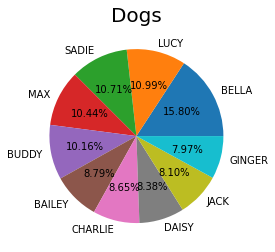

In [73]:
dog_names = []
num_dog_names = []

with open('dog-names-over-time-1.csv') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    
    for row in plots:  # Reading only Dog names and amount of registered names
        dog_names.append(row[0])
        num_dog_names.append(row[1])

# The Top Ten names
plt.pie(num_dog_names [1:11], labels = dog_names [1:11], autopct = '%.2f%%')
plt.title('Top Dog! (names)', fontsize = 15)

plt.show() # Displays names and percentage of total names

## Bottom 10 Dog Names

In [74]:
df[['DogName','Count','Rank']].tail(10) # Bottom 10 names

,DogName,Count,Rank
16222,ZOEY MARIE,1,1259
16223,ZONA,1,1259
16224,ZOOIE,1,1259
16225,ZORBA,1,1259
16226,ZORRA,1,1259
16227,ZOTTER,1,1259
16228,ZSA ZSA,1,1259
16229,ZUILA,1,1259
16230,ZUNI,1,1259
16231,ZURI,1,1259
